# 심층 신경망

## 2개의 층
- 층을 늘려보자
- 입력층과 출력층 사이에 밀집층을 추가
    - 입력층과 출력층 사이에 있는 모든 층을 **은닉층**이라고 함
        - 은닉층에도 활성화 함수가 들어가 있음(활성화함수 : 신경만 층의 선형방정식의 계산값에 적용하는 함수)
        - 출력층에는 활성화 함수가 제한되어 있음(이진분류:시그모이드, 다중분류:소프트맥스)
        - 은닉층에서는 비교적 자유롭게 활성화 함수를 사용할 수 있음
        - tip.분류문제에서는 확률을 계산하기위해 활성화 함수를 써야하지만 회귀문제의 출력은 임의의 어떤 값이므로 선형방정식의 계산을 그래도 출력하므로 활성화함수를 지정하지 않는다.
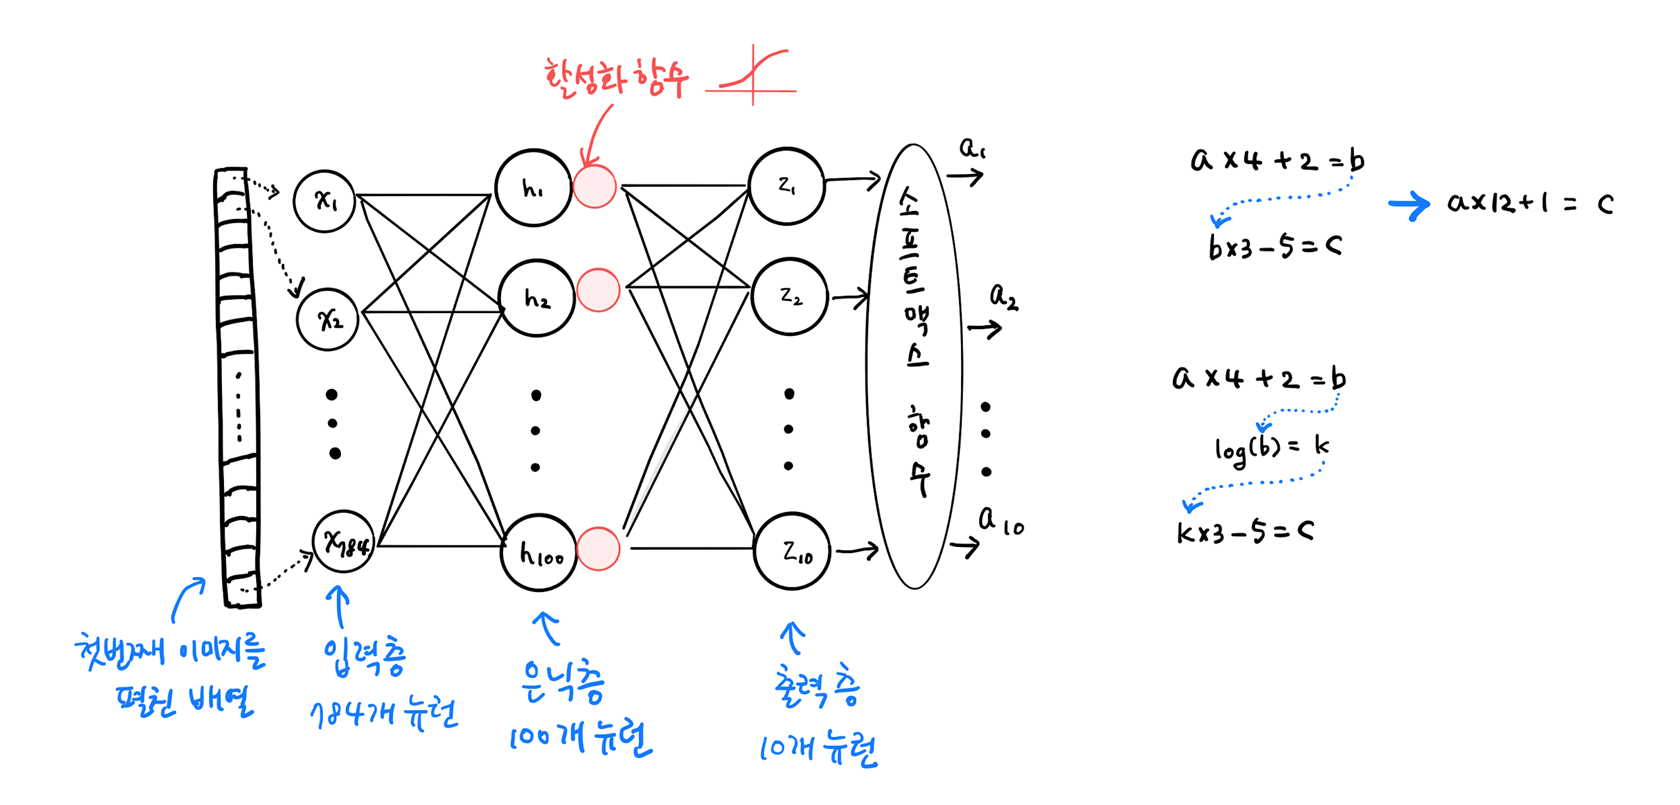

### 은닉층에 활성화 함수를 적용하는 이유?
- 아래 예시 방정식을 살펴보면
- 왼쪽의 첫번째 식에서 계산된 b가 두번째 식에서 c를 계산하기 위해 쓰였음
    - 그러나 두번째 식에 첫번째 식을 대입하면 하나의 식으로 합쳐질 수 있음
    - b는 사라짐:b가 하는일이 없는 셈이 됨
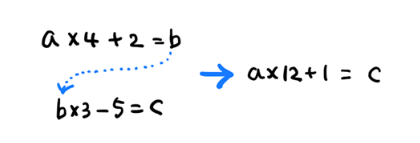

### 신경망의 방정식
- 은닉층에서 선형적인 산술 계산만 하면 수행역할이 없어지게 됨
    - 선형계산을 적당히 비틀어야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 수행할 수 있음
    - 그런 이유로 활성화 방정식을 적용시켜 선형을 적당히 비틀어 비선형화시키게 됨
    - 활성화함수는 은닉층에 포함되어 있다고 보고 번거로움을 방지하기 위해 표시하지 않는 경우가 많음. but, 모든 은닉층에는 활성화 함수가 들어 있으며 그 함수를 통해 나온 결과가 다음 층에서 역할을 하게 됨
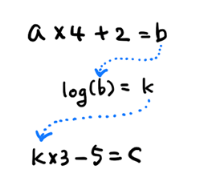

### 많이 사용하는 활성화 함수
- 시그모이드 함수 : 뉴런의 출력 z 값을 0과 1로 압축하는 역할을 함
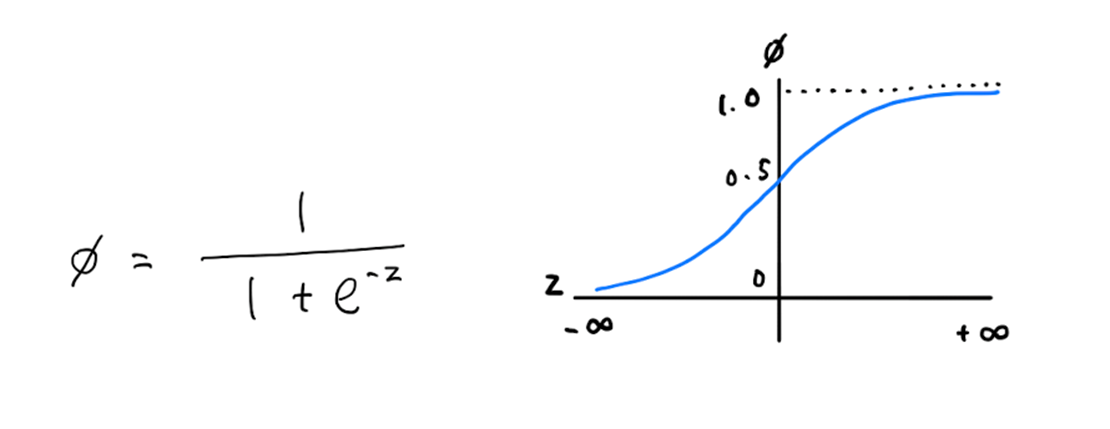

- dense1은 은닉층이고 100개의 뉴런을 가진 밀집층
    - 은닉층의 뉴런 개수를 정하는데는 특별한 기준은 없음. 몇개의 뉴런을 두어야 할지는 상당히 많은 경험을 필요로 함
        - 데이터의 속성, 크기등 데이터에 따라 달라지기 때문에 하이퍼파라미터로 사용하고 여러 경우를 적용시켜야 함
        - 단, 적어도 출력층보다는 많게 만들어야 한다. 클래스 10개에 대한 확률을 예측하는데 은닉층이 10보다 작으면 적은 정보를 전달하게 됨. 
        - 현재 은닉층의 출력이 다음 층의 입력이 된다는 사실을 명심해야 하고,
            - 예제에 대입시키면 784개의 입력이 100개의 출력이 되는 것 이므로 데이터가 상당히 압축(특성추출)된다고 봐야 함

## 심층 신경망 만들기
- 여러개의 층을 추가하려면 리스트로 만들어서 전달, 다만 출력층을 가장 마지막에 두어야 함
- 처음 은닉층부터 마지막 출력층까지 순서대로 나열해야 한다
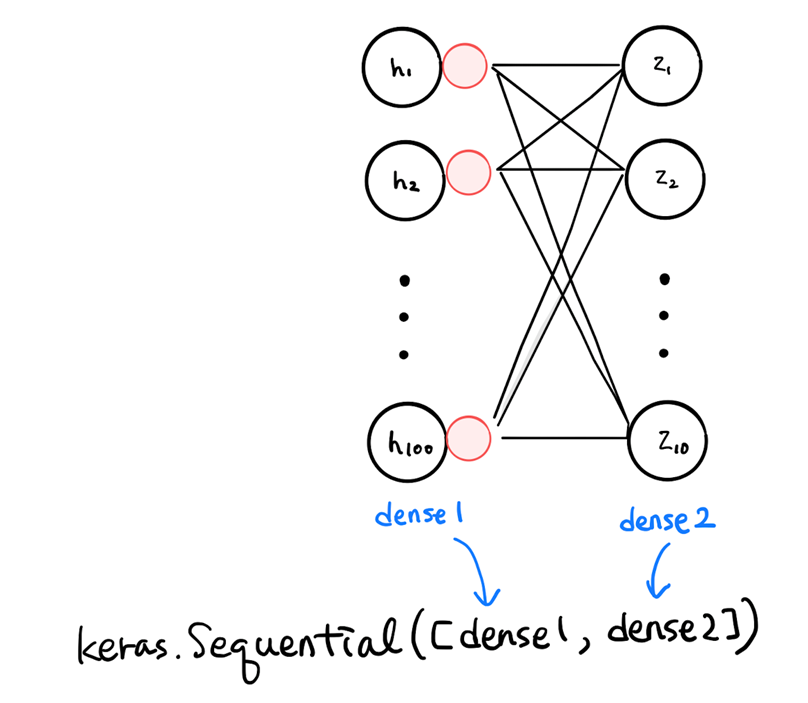
- 인공신경망의 강력한 성능은 층을추가하여 입력데이터에 대해 연속적인 학습을 진행하는 능력에서 나옴
    - 2개 이상의 층을 추가할 수 있으며 몇개의 층을 추가할건지는 사이언티스트의 결정에 달림

- 출력 크기 : Output Shape
    - 첫번째 차원은 샘플 개수이며 샘플개수가 아직 정해져 있지 않으므로 None
        - fit()메서드에 훈련데이터를 추가하면 한번에 모두 사용하지 않고 잘게 나누어 여러번에 걸쳐 경사하강법을 수행함(미니배치 경사하강법)
        - 케라스의 기본 미니배치 크기는 32개이며, fit()메서드에서 변경 가능 함
        - 샘플크기를 고정하지 않고 어떤 크기에도 유연하게 반응하기 위해 None로 설정
        - 배치 차원 이라고 함
    - 두번째 차원은 출력크기 : 이 예제에서는 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축됨
- 모델 파라미터 : Param #
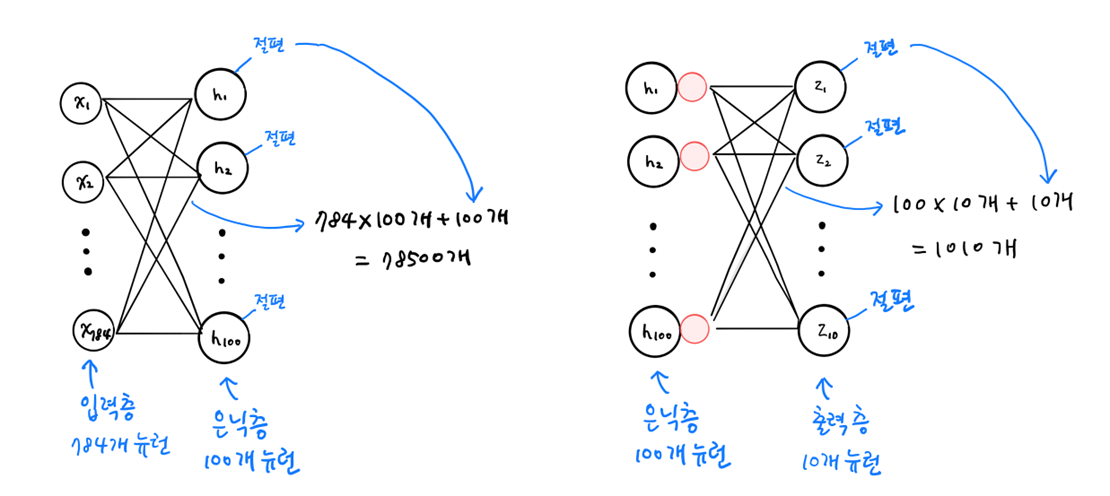
- 간혹 경사하강법으로 훈련되지 않는 파라미터가 있을 수 있음

## 층을 추가하는 다른 방법

- 추가된 층이 성능을 향상시켰음
-  0.8516 -> 0.8771

## 렐루 활성화 함수

- 시그모이드 함수(초창기 인공신경망에 가장 많이 사용됨)
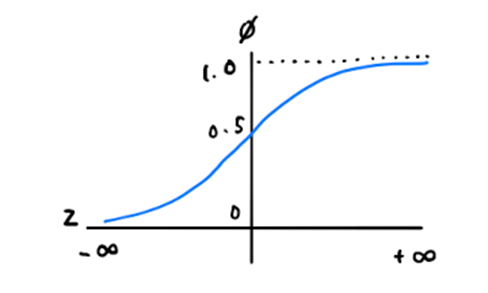
- 오른쪽 끝과 왼쪽 끝으로 갈수록 그래프가 누워 있기 때문에 올바른 출력에 신속하게 대응하지 못함(출력 계산이 복잡해 짐)
    - 층이 많은 신경망 일수록 누적되어 학습을 어렵게 했고 계선하기 위한 다른 종류의 활성화 함수가 제안됨 => 렐루함수


- 렐루함수
    - 임력이 양수일 경우 활성화 함수가 없는것처럼 그냥 통과시키고 
    - 음수일경우에 0을 만들어버림
    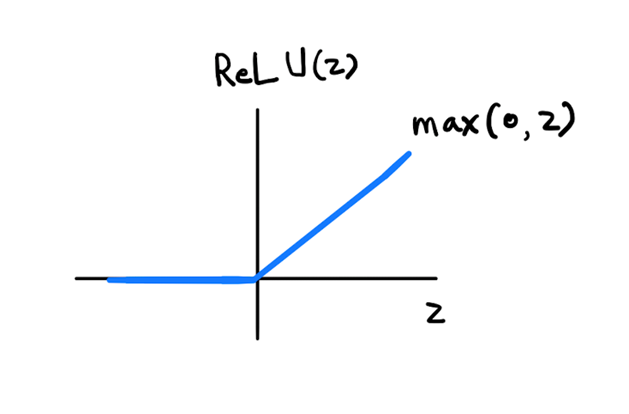
    - max(0,Z) : Z가 0보다 크면 Z를, 작으면 0을 출력
    - 이미지 처리에 좋은 성능을 낸다고 알려져 있음

### flatten 층
- 이미지를 1차원으로 처리하기 위해 reshape 함수를 써서 직접 1차원으로 변경
- 케라스는 직접 1차원으로 변경하도록 층을 하나 제공하는데 그 층이 Flatten 층임(Flatten 클래스)
- Flatten 클래스는 배치 차원을 제외하고 나머지 입력차원을 모두 일렬로 펼치는 역할을 하며
    - 입력층 바로 뒤에 추가해야 함(즉, input_shape을 flatten 층이 갖고 있어야 함)

- 0.8771 -> 0.8781
- relu 함수 적용 후 아주 약간 성능향상이 있음

## 옵티마이저
- 신경망은 하이퍼파라미터가 많음
    - 지금까지 하이퍼파라미터
        - 은닉층의 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수
        - model 컴파일 시 배치를 위한 optimizer를 하이퍼 파라미터로 제공함
            - 기본 배치를 위한 optimizer는 RMSprop 방식의 경사하강법임

### 다양한 옵티마이저 함수들
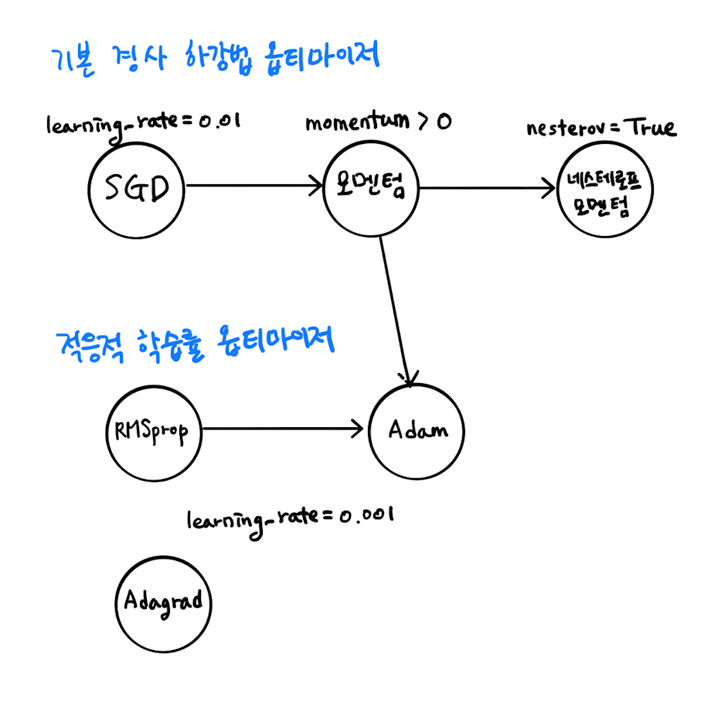
- 모멘텀 변수 값을 0값보다 큰값을 사용하면 그라디언트부스트 처럼 부스팅(가속화)기법을 사용함
    - 보통 모멘텀 변수값은 0.9 이상을 지정
- nesterov=True 면 네스테로프 모멘텀 최적화를 사용
    - 모멘텀 최적화를 2번 반복 구현
    - 기본 경사하강법을 쓰는것보다 더 나은 성능을 제공한다고 알려져 있음
- 적응적 학습률
    - 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있음
        - 안정적으로 최적점에 수렴할 가능성이 높아짐(학습률 매개변수 튜닝의 수고를 덜수 있음)
    - RMSprop, Adagrd
- Adam : 모멘텀 최적화와 RMSprop의 장점을 접목한 옵티마이저 함수
    - 맨처음 시도해 볼 수 있는 좋은 옵티마이저임

- 0.8781->0.8841
- 옵티마이저 변경 후 약간의 성능향상
- 반드시 이렇게 나오지는 않음 약간의 차이가 있을 수 있다. 랜덤방식이 적용되기 때문임